# Analysis of TSP Approximation Algorithms
## Introduction
The problem is often described as a salesman who would like to visit each city no more than once and return home. The journey to each city has a certain expense; the salesman would like to find the most optimal solution. This can be represented with edge weights between the vertices. So we want to find a route where the sum of the edge weights is the lowest possible value. Given a large set of cities (nodes) this has proven to be an intractable problem- it's NP-hard. 

Before getting into it, let's consider two other common paths that may traverse a graph. The first is an Eulerian circuit which touches every node in the graph and returns to the origin. The second is a Hamiltonian cycle which similar to the Eulerian cycle in that it must touch every node and return to the origin. However the Hamiltonian cycle mandates that each node is only visited once. This is quite similar to the traveling salesman problem, a reduction can be shown to prove that TSP is NP-hard without too much massaging. So once again, think of the Traveling Salesman Problem as finding the Hamiltonian cycle with the minimum possible weight.


It's important to note that the algorithms in question, and indeed the ones I intend to implement, are only approximations. Approximations appear to be the only way to solve inputs that are millions of cities large. They find solutions appromization ratios which may be considered "good enough". Good enough of course depends on the standard one chooses to hold, but algorithms of note seem to yield a solution which is 2-3% close to optimal.[1] One of the approximations will fail terribly, this is the nearest neighbor. Christofides actually does quite well, yielding the best approximation ratio of all known algorithms in the general case. The detached-stem method, also known as the Lin–Kernighan heuristic, will also be investigated. < TODO More here > 

// Theory of TSP and the like
Three assumptions for TSP
1) The distance between any two nodes is greater than or equal to zero d(x,y) >= 0
2) The graph is undirected d(x,y) = d(y,x) 
3) The triangle inequality exists: If a single edge reachs a point that two or more edges can reach together, the single edge is shorter than the sum of the other edges. d(x,y) + d(y,z) >= d(x,z)


// need test vectors

// nearest neighbor
// TODO write the shittiest algorithm and watch it suck

In [44]:
# This cell must be run before the other cells.
import networkx as nx
import random as rng
from networkx.drawing.nx_pydot import write_dot

Number of nodes in small graph: 4
Graph created


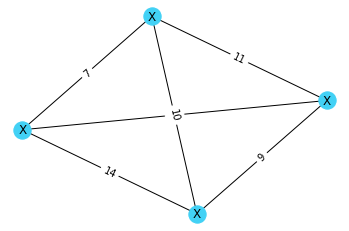

In [427]:
####### Small graph stuff #######
sm_num_of_nodes = 4 # rng.randrange(4)  
max_edge_weight = 20
prob_of_edge_creation = 1.0

print("Number of nodes in small graph: {}".format(sm_num_of_nodes))

sm_graph = nx.fast_gnp_random_graph(sm_num_of_nodes, prob_of_edge_creation, None, False)
print("Graph created")

# for each node in the small graph, initialize it to unvisited
node_labels = [{'visited': 'X', 'origin': False}] # if this .--  is not a dictionary then it's applied to all nodes
nx.set_node_attributes(sm_graph, node_labels, 'node-label')

# for each node in the large graph, initialize it to unvisited
node_labels = ['X'] 
nx.set_node_attributes(lg_graph, node_labels, 'node-label')

# for each node in the small graph, assign a random weight
for (u, v) in sm_graph.edges():
    sm_graph.edges[u,v]['weight'] = rng.randint(1, max_edge_weight)
    
# add edges to the small graph that is printable
pos = nx.nx_agraph.graphviz_layout(sm_graph)
edge_labels = nx.get_edge_attributes(sm_graph,'weight')
edges_label = nx.draw_networkx_edge_labels(sm_graph, pos, edge_labels = edge_labels)

# need to remove the origin attribute being passed to `draw` to keep it clean
node_labels = nx.get_node_attributes(sm_graph, 'node-label')
print_node_labels = dict()
for n in node_labels.items():
    print_node_labels[n[0]] = n[1][0]['visited']

# Draw the graph below
nx.draw(sm_graph, pos=pos, labels=print_node_labels, node_color='#42d1f5')

####### Large graph stuff #######
# for each node in the large graph, assign a random weight
# lg_num_of_nodes = rng.randrange(40, 60) # the other is `lg` which is a large graph output to a file.
# lg_graph = nx.fast_gnp_random_graph(lg_num_of_nodes, prob_of_edge_creation, None, False)
# print("Number of nodes in large graph: {}".format(lg_num_of_nodes))

# for (u, v) in lg_graph.edges():
#     lg_graph.edges[u,v]['weight'] = rng.randint(0, max_edge_weight)

# # write the dot file TODO: maybe write edges
# write_dot(lg_graph, 'file.dot')
# print("Dot file written")
# ! dot -Tpng file.dot -o file.png  # add -v for verbose output
# print("Dot to png conversion complete")
# ! chmod 777 file.png # wide open permissions until this is constrained

# print("\nThis is a graph before finding an optimal path.")

An interesting thing to note about nearest neighbor is we'd technically always choose the lowest edge to ALL points in the graph. However, no node could exist two edges away and have a lesser weight then if we'd go through the intermediate note. With the assumption that there are no negative weights, that is.

THE ALGORITHM CAN FAIL! When that happens we simply choose another node in the set. that is why there is n^2 running time, we may need to try all possible paths.

DO THE OTHER ALGORITHMS DEPEND ON TRIANGLE INEQUALITY

Wikipedia psuedocode 
 * Initialize all vertices as unvisited.
 * Select an arbitrary vertex, set it as the current vertex u. Mark u as visited.
 * Find out the shortest edge connecting the current vertex u and an unvisited vertex v.
 * Set v as the current vertex u. Mark v as visited.
 * If all the vertices in the domain are visited, then terminate. Else, go to step 3.

In [428]:
# At the beginning, all nodes are unvisited and marked with 'X'
# get a random value between 0 and the number of nodes
# origin = rng.randrange(0, sm_num_of_nodes)

# origin is the current_node to start
current_node = 0

max_edge_weight = 21 # remove this once the other cell is reran
next_node = None
next_node_edge = None  # TODO: accumulate edge weight

# set origin to true by accessing that particular node and updating it's attribute by sending in a new dict
nx.set_node_attributes(sm_graph, {current_node: {'node-label': [{'visited': 'o', 'origin': True}]}})

print("Everything:")
print(sm_graph.nodes.data())
print("\n\n")
for i in range(30):
    # flag to show if further travel is possible
    neighbor_exists = False
    
    # reset the highest possible weight
    lowest_weight_edge = max_edge_weight + 1

    # all nodes that share an edge incident to current_node
    neighbors = [n for n in sm_graph.neighbors(current_node)]
    
    # perhaps print the neighbors
    
    print("The lowest weight edge is " + str(lowest_weight_edge))
    print("Next node is " + str(next_node))
    for node in neighbors:
        
        print("The neighbor being investigated is " + str(node))
        
        # has the neighbor node been visited
        not_visited = sm_graph.nodes[node]['node-label'][0]['visited'] != 'o'
        print("The node has not been visited " + str(not_visited))
        
        # weight of the edge to the neighbor node
        edge_weight_to_neighbor = sm_graph.get_edge_data(current_node, node)['weight']
        print("The edge weight to this neighbor is " + str(edge_weight_to_neighbor))
        
        # is neighbor node the origin
        is_origin = sm_graph.nodes[node]['node-label'][0]['origin']
        print("Is it the origin " + str(is_origin))
        
        # if the node hasn't been visited and the edge between this and that is current minimum and it ain't the origin
        if not_visited and edge_weight_to_neighbor < lowest_weight_edge and not is_origin:
            print("Edge accessed")
            # this is now the edge lowest weight edge leaving `u`
            lowest_weight_edge = edge_weight_to_neighbor
            next_node = node
            neighbor_exists = True # need to know if we should try and return to origin
    
    
    # TODO: need to figure out how to bail from loop
    if not neighbor_exists:
        print("\n#### No path remains ####\n")
    
    print("The current node is " + str(current_node))
    print("The next node is " + str(next_node))
    current_node = next_node 
    print("The current node has been set to the next node")
    
    # update the visited node    
    print("It used to have this label " + str(sm_graph.nodes[current_node]['node-label']))
    nx.set_node_attributes(sm_graph, {current_node: {'node-label': [{'visited': 'o', 'origin': True}]}})
#     sm_graph.nodes[current_node]['node-label'][0]['visited'] = 'o'
    print("The node's new node label is " + str(sm_graph.nodes[current_node]['node-label']))  

    print("----\n")
    print(sm_graph.nodes.data())
    print("----\n")
    # if no routes exist try and get back to the origin 

# print(lowest_weight_edge)

Everything:
[(0, {'node-label': [{'visited': 'o', 'origin': True}]}), (1, {'node-label': [{'visited': 'X', 'origin': False}]}), (2, {'node-label': [{'visited': 'X', 'origin': False}]}), (3, {'node-label': [{'visited': 'X', 'origin': False}]})]



The lowest weight edge is 22
Next node is None
The neighbor being investigated is 1
The node has not been visited True
The edge weight to this neighbor is 18
Is it the origin False
Edge accessed
The neighbor being investigated is 2
The node has not been visited True
The edge weight to this neighbor is 14
Is it the origin False
Edge accessed
The neighbor being investigated is 3
The node has not been visited True
The edge weight to this neighbor is 7
Is it the origin False
Edge accessed
The current node is 0
The next node is 3
The current node has been set to the next node
It used to have this label [{'visited': 'X', 'origin': False}]
The node's new node label is [{'visited': 'o', 'origin': True}]
----

[(0, {'node-label': [{'visited': 'o', 'ori

![dotimage](./file43.png)
// begin with christofides

// the third one
    // ejection chains

// comparison of the three

// results

// conclusion

// references
[1] https://www.sciencedirect.com/science/article/pii/S0377221710006065?via%3Dihub

In [174]:
d = {1: {'weight': 8}, 2: {'weight': 14}, 13: {'weight': 1}}
lowest = 15
for e,k in d.items():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-174-72c738394b5c>, line 4)

In [175]:
# helper stuff

# this is how you access a particular node

# this is how you change a node's attribute
change_label = {7:'visited'}
nx.set_node_attributes(sm_graph, change_label, 'node-label')
print(sm_graph.nodes[7])

# random
1 in G     # check if node in graph

[n for n in G if n != None]  # iterate through nodes

len(G)  # number of nodes in graph

# traverse via edges
for u, v, weight in G.edges.data('weight'):
    if weight is not None:
        # Do something useful with the edges
        pass
    
G[<some-node>] # same as G.adj, this returns a dict of all the neighbor nodes

# print all of the neighbors of a node
for n in sm_graph.neighbors(7):
    print(n)
    
# or do this for list comprehension
[n for n in sm_graph.neighbors(7)]

# accessing an individual node attribute i.e. visited or unvisited
sm_graph.nodes[7]['node-label']

# part of me wants to update the node attributes like this
nx.set_node_attributes(G, {1:{'weight':-1, 'volume':4}})
G.nodes[1]['weight']
# or this
g.nodes['node1'].update(optional_attrs)  
# but what I really need to do is not have that attribute in list of edge weight/ neighbor node attributes


# getting an edge
G.edges([0, ])  # only edges incident to these nodes

{'node-label': 'visited'}
1
2
13


'visited'